<h2 style='text-align: center;'>简介</h2>

<p>本学习项目使用kaggle：
    <a href='https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce'>Brazilian E-Commerce Public Dataset by Olist</a>
    数据集。
</p>

<p>数据集包含2016至2018年期间巴西电子商务平台Olist上的订单数据。文件结构如下：
    <img src='https://i.imgur.com/HRhd2Y0.png'></img>
</p>

<p>
    参考教程：
    <a href='https://www.kaggle.com/code/pavelgrigoryev/deep-sales-analysis-eda-viz-rfm-nlp-geo'>Deep Sales Analysis: EDA | Viz | RFM | NLP | Geo</a>
</p>



<h2 style='text-align: center;'>开始学习</h2>

<h3>1.初始配置</h3>

In [15]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# 设置显示选项以显示所有列
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 1000)        # 设置显示宽度
pd.set_option('display.max_colwidth', None) # 显示完整的列内容

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

<h3>2.初步分析数据</h3>

<h4>2.1 导入数据表</h4>

In [17]:
# 导入文件
df_customers    = pd.read_csv('olist_customers_dataset.csv')
df_geolocation  = pd.read_csv('olist_geolocation_dataset.csv')
df_items        = pd.read_csv('olist_order_items_dataset.csv')
df_payments     = pd.read_csv('olist_order_payments_dataset.csv')
df_reviews      = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders       = pd.read_csv('olist_orders_dataset.csv')
df_products     = pd.read_csv('olist_products_dataset.csv')
df_sellers      = pd.read_csv('olist_sellers_dataset.csv')
df_product_name = pd.read_csv('product_category_name_translation.csv')

<h4>2.2 orders数据表</h4>

In [18]:
# 查看df_orders信息
print(df_orders.info())
print('-'*100)
print(df_orders.describe(include='all'))
print('-'*100)
print(df_orders.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
----------------------------------------------------------------------------------------------------
                                order_id                       customer_id order_status order_purchase_timestamp    order_approved_at order_delivered_carrie

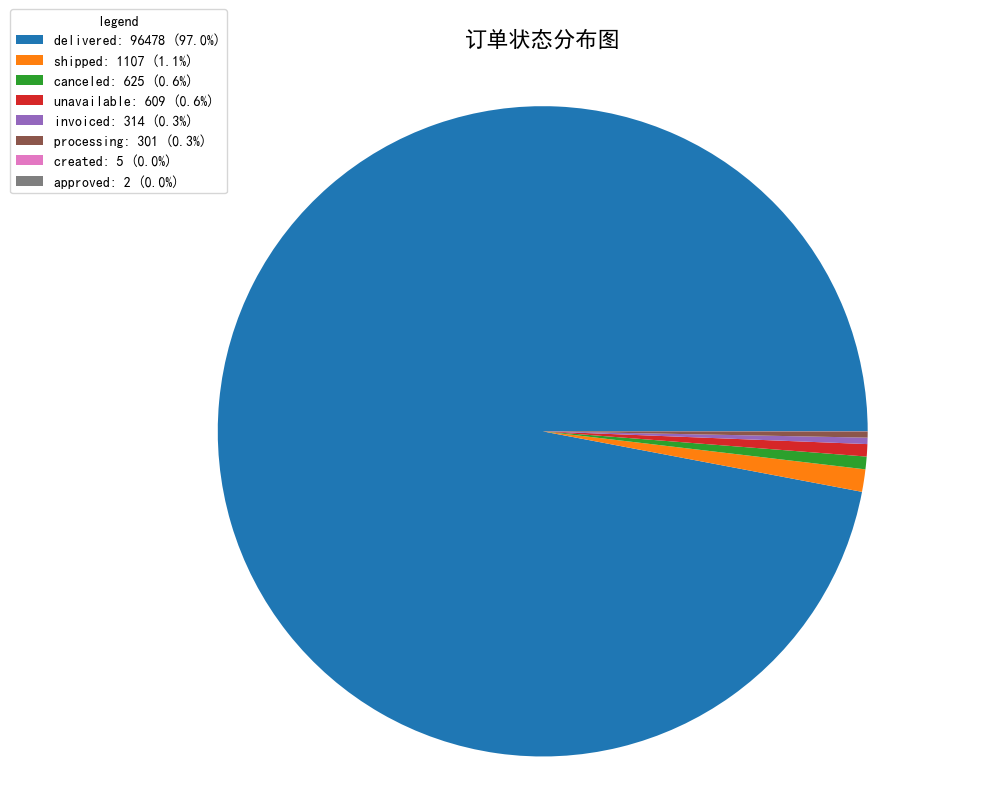

In [39]:
data_counts = df_orders['order_status'].value_counts()

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制饼图
wedges, texts = ax.pie(data_counts.values)

# 设置标题
ax.set_title('订单状态分布图', fontsize=16, pad=20)

# 在创建图例
legend_labels = [f'{label}: {count} ({count/sum(data_counts.values):.1%})' 
                 for label, count in data_counts.items()]

# 添加图例到左上角
ax.legend(wedges, legend_labels,
          title="legend",
          loc="upper left",
          bbox_to_anchor=(-0.1, 1.1),  # 调整图例位置
          fontsize=10)

# 确保饼图是圆形
ax.axis('equal')

plt.tight_layout()
plt.show()

<h4>2.2 payments数据表</h4>

In [20]:
# 查看df_payments信息
print(df_payments.info())
print('-'*100)
print(df_payments.describe(include='all'))
print('-'*100)
print(df_payments.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
----------------------------------------------------------------------------------------------------
                                order_id  payment_sequential payment_type  payment_installments  payment_value
count                             103886       103886.000000       103886         103886.000000  103886.000000
unique                             99440                 NaN            5                   NaN            NaN
top     fa65dad1b0e818e3c

In [21]:
# payment_sequential改成object类型
df_payments['payment_sequential'] = df_payments['payment_sequential'].astype('object')
print(df_payments['payment_sequential'].dtype)
# 查看payment_sequential的统计信息
print(df_payments['payment_sequential'].describe())

object
count     103886
unique        29
top            1
freq       99360
Name: payment_sequential, dtype: int64


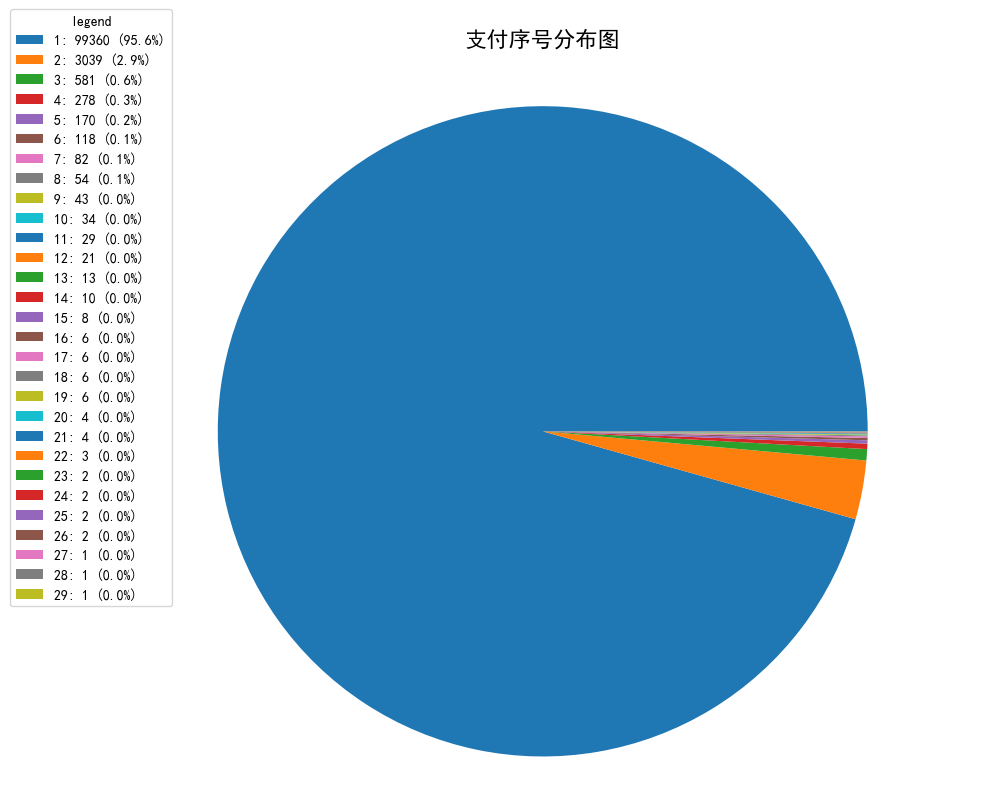

In [38]:
data_counts = df_payments['payment_sequential'].value_counts().sort_index()

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制饼图
wedges, texts = ax.pie(data_counts.values)

# 设置标题
ax.set_title('支付序号分布图', fontsize=16, pad=20)

# 在创建图例
legend_labels = [f'{label}: {count} ({count/sum(data_counts.values):.1%})' 
                 for label, count in data_counts.items()]

# 添加图例到左上角
ax.legend(wedges, legend_labels,
          title="legend",
          loc="upper left",
          bbox_to_anchor=(-0.1, 1.1),  # 调整图例位置
          fontsize=10)

# 确保饼图是圆形
ax.axis('equal')

plt.tight_layout()
plt.show()

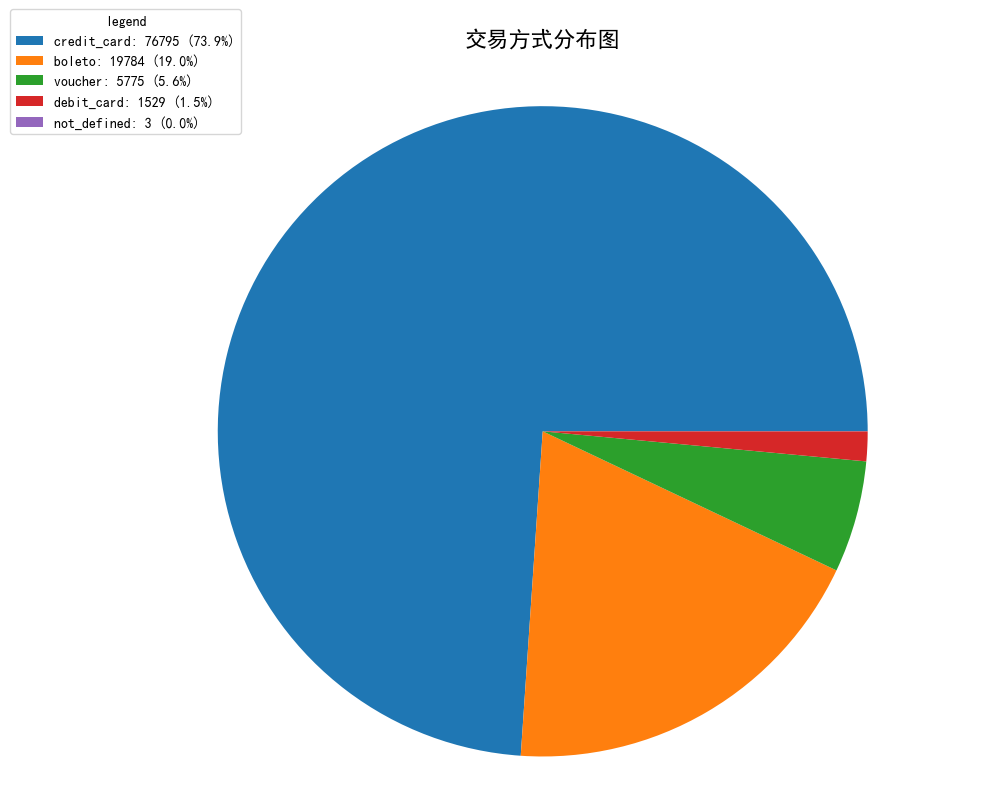

In [37]:
data_counts = df_payments['payment_type'].value_counts()

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制饼图
wedges, texts = ax.pie(data_counts.values)

# 设置标题
ax.set_title('交易方式分布图', fontsize=16, pad=20)

# 在创建图例
legend_labels = [f'{label}: {count} ({count/sum(data_counts.values):.1%})' 
                 for label, count in data_counts.items()]

# 添加图例到左上角
ax.legend(wedges, legend_labels,
          title="legend",
          loc="upper left",
          bbox_to_anchor=(-0.1, 1.1),  # 调整图例位置
          fontsize=10)

# 确保饼图是圆形
ax.axis('equal')

plt.tight_layout()
plt.show()

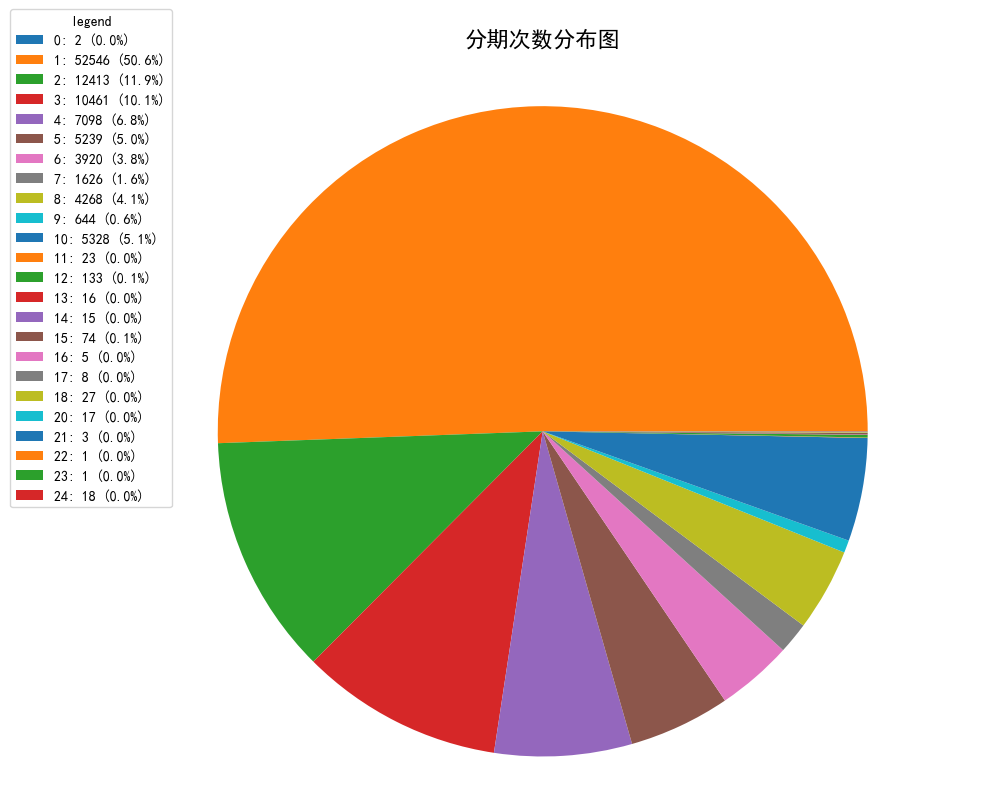

In [36]:
data_counts = df_payments['payment_installments'].value_counts().sort_index()

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制饼图
wedges, texts = ax.pie(data_counts.values)

# 设置标题
ax.set_title('分期次数分布图', fontsize=16, pad=20)

# 在创建图例
legend_labels = [f'{label}: {count} ({count/sum(data_counts.values):.1%})' 
                 for label, count in data_counts.items()]

# 添加图例到左上角
ax.legend(wedges, legend_labels,
          title="legend",
          loc="upper left",
          bbox_to_anchor=(-0.1, 1.1),  # 调整图例位置
          fontsize=10)

# 确保饼图是圆形
ax.axis('equal')

plt.tight_layout()
plt.show()

<h4>2.3 items数据表</h4>

In [25]:
# 查看df_items信息
print(df_items.info())
print('-'*100)
print(df_items.describe(include='all'))
print('-'*100)
print(df_items.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
----------------------------------------------------------------------------------------------------
                                order_id  order_item_id                        product_id                         seller_id  shipping_limit_date          price  freight_value
count                             112650  112650.000000                            11265

<h4>2.4 reviews数据表</h4>

In [ ]:
# 查看df_reviews信息
print(df_reviews.info())
print('-'*100)
print(df_reviews.describe(include='all'))
print('-'*100)
print(df_reviews.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
----------------------------------------------------------------------------------------------------
                               review_id                          order_id  review_score review_comment_title review_comment_message review_creation_date review_answer_timestamp
count                              99224                             99224  99224

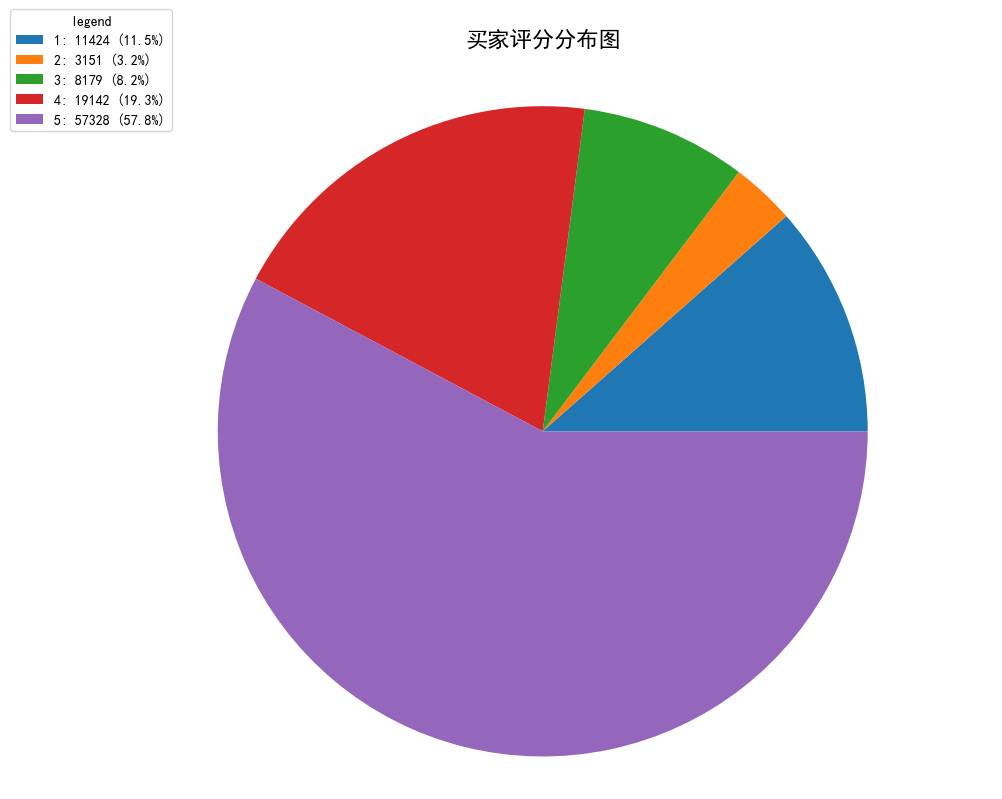

In [35]:
# 绘制扇形图
data_counts = df_reviews['review_score'].value_counts().sort_index()

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制饼图
wedges, texts = ax.pie(data_counts.values)

# 设置标题
ax.set_title('买家评分分布图', fontsize=16, pad=20)

# 在创建图例
legend_labels = [f'{label}: {count} ({count/sum(data_counts.values):.1%})' 
                 for label, count in data_counts.items()]

# 添加图例到左上角
ax.legend(wedges, legend_labels,
          title="legend",
          loc="upper left",
          bbox_to_anchor=(-0.1, 1.1),  # 调整图例位置
          fontsize=10)

# 确保饼图是圆形
ax.axis('equal')

plt.tight_layout()
plt.show()

<h4>2.5 customers数据表</h4>

In [31]:
# 查看df_customers信息
print(df_customers.info())
print('-'*100)
print(df_customers.describe(include='all'))
print('-'*100)
print(df_customers.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
----------------------------------------------------------------------------------------------------
                             customer_id                customer_unique_id  customer_zip_code_prefix customer_city customer_state
count                              99441                             99441              99441.000000         99441          99441
unique                             99441                             96096                       N

<p>每个订单都会被分配一个唯一的customer_id
<br>customer_unique_id 是买家的唯一标识符
<br>customer_zip_code_prefix 是买家的邮政编码前缀
<br>customer_city 是买家的城市
<br>customer_state 是买家的州</p>


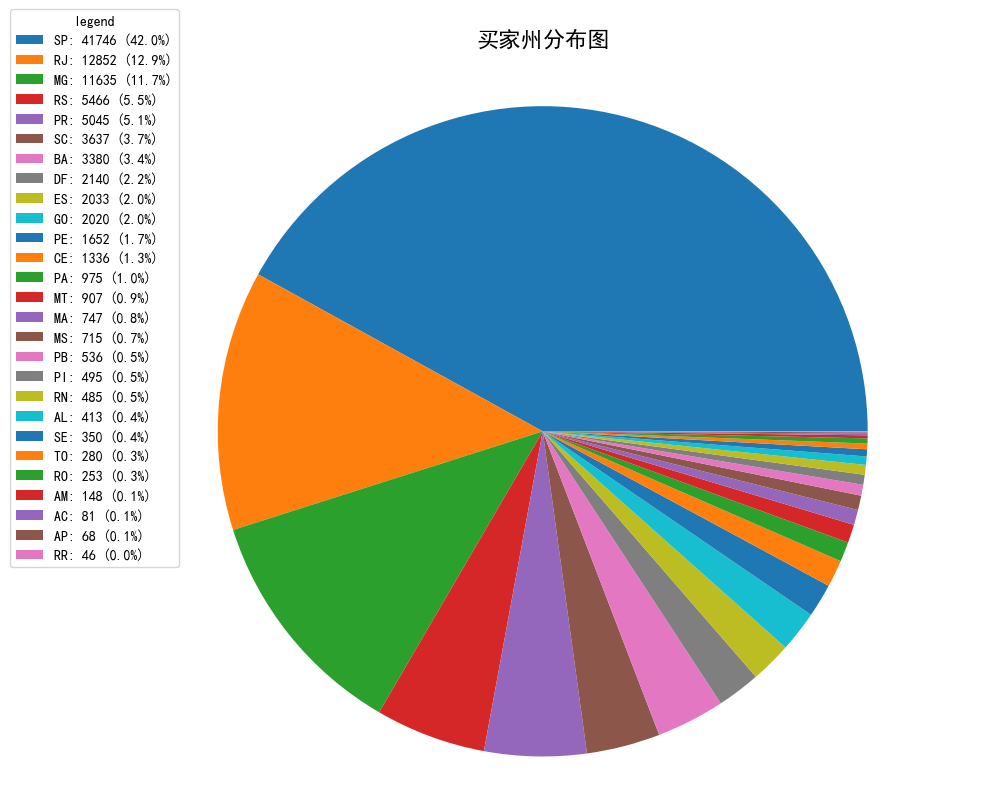

In [42]:
# 绘制扇形图
data_counts = df_customers['customer_state'].value_counts()

# 创建图形和子图
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制饼图
wedges, texts = ax.pie(data_counts.values)

# 设置标题
ax.set_title('买家州分布图', fontsize=16, pad=20)

# 在创建图例
legend_labels = [f'{label}: {count} ({count/sum(data_counts.values):.1%})' 
                 for label, count in data_counts.items()]

# 添加图例到左上角
ax.legend(wedges, legend_labels,
          title="legend",
          loc="upper left",
          bbox_to_anchor=(-0.1, 1.1),  # 调整图例位置
          fontsize=10)

# 确保饼图是圆形
ax.axis('equal')

plt.tight_layout()
plt.show()

In [43]:
# 绘制买家城市分布表（城市太多图放不下）
data_counts = df_customers['customer_city'].value_counts()
print(data_counts)


customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64
